# Phase 1: Data pre-processing

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Load the dataset
df = pd.read_csv('diabetes.csv')

In [ ]:
# Display the first 5 rows to verify it loaded correctly
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
print("Shape:", df.shape)

Shape: (768, 9)


In [ ]:
print("Data Types\n", df.dtypes)

Data Types
 Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [ ]:
print("Missing Values:\n", df.isna().sum())

Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


# Phase 2: Exploratory Data Analysis (EDA)

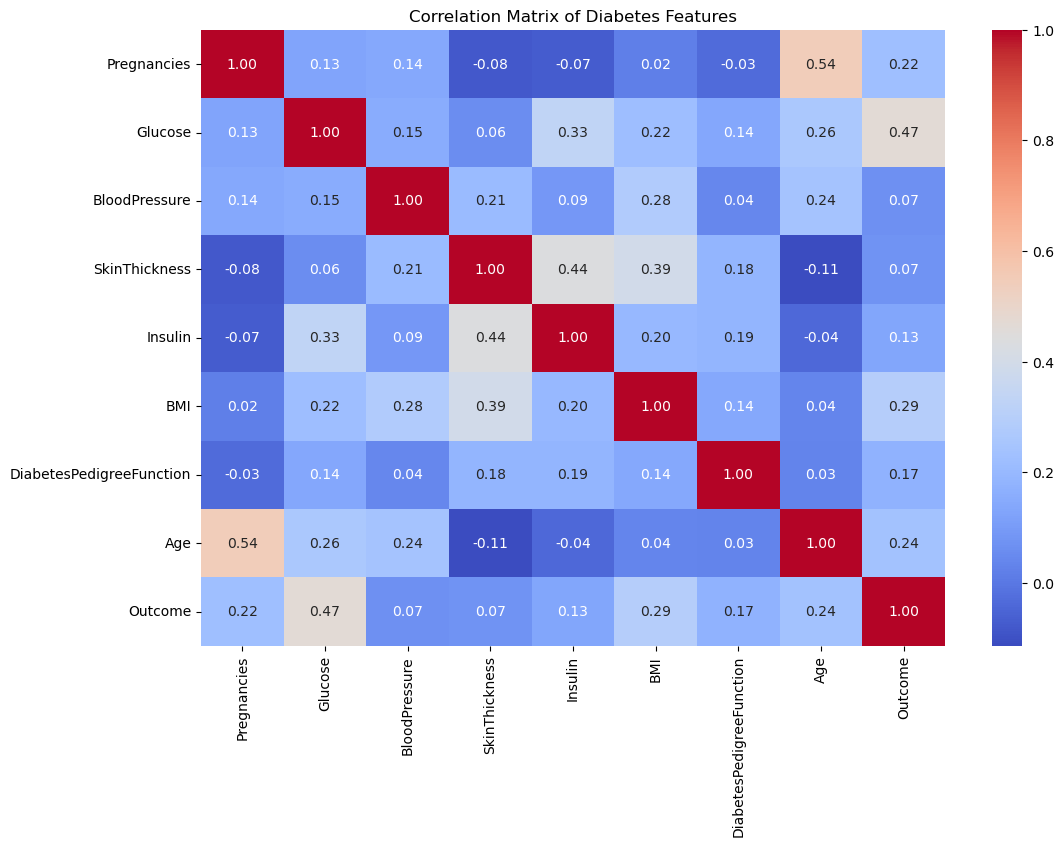

In [ ]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Diabetes Features')
plt.show()

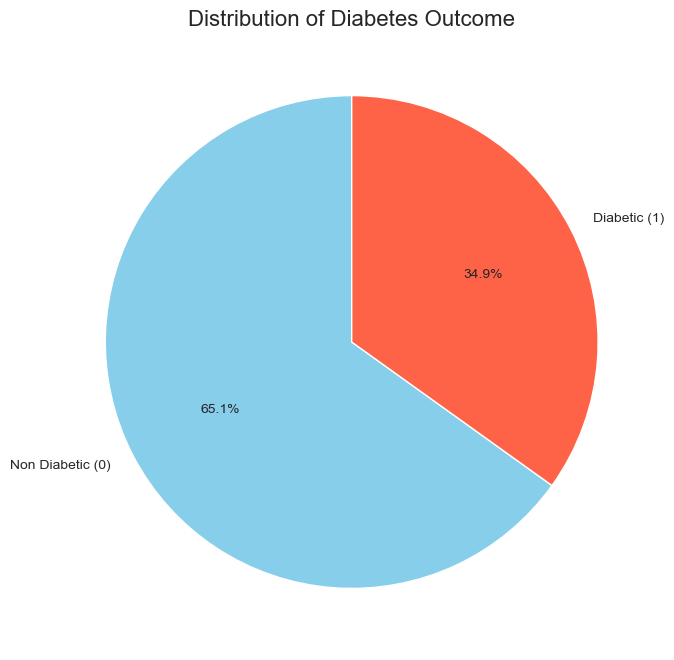

In [ ]:
# Set the style for the plots
sns.set_style("whitegrid")

# Calculate the counts for each outcome
outcome_counts = df['Outcome'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(outcome_counts, labels=['Non Diabetic (0)', 'Diabetic (1)'], autopct='%1.1f%%', startangle=90, colors=['#87CEEB', '#FF6347'])
plt.title('Distribution of Diabetes Outcome', fontsize=16)
plt.show()

#Phase 3: Predictive Modeling

In [ ]:
# Separate features (X) and target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (614, 8)
Shape of X_test: (154, 8)


In [ ]:
# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

In [ ]:
# Calculate accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Training Accuracy: 0.7915
Test Accuracy: 0.7143


In [ ]:
# Check for overfitting/underfitting
if train_acc > test_acc + 0.05:
    print("\nResult: Overfitting detected. The model performs much better on the data it was trained on.")
elif test_acc > train_acc + 0.05:
    print("\nResult: Underfitting detected (Unusual). The model performs better on unseen data.")
else:
    print("\nResult: Good fit. The model generalizes well.")


Result: Overfitting detected. The model performs much better on the data it was trained on.


In [ ]:
# Initialize a new model with stronger regularization (smaller C)
regularized_model = LogisticRegression(max_iter=1000, C=0.1, random_state=42)
regularized_model.fit(X_train_scaled, y_train)

LogisticRegression(C=0.1, max_iter=1000, random_state=42)

In [ ]:
# Make new predictions
y_train_pred_reg = regularized_model.predict(X_train_scaled)
y_test_pred_reg = regularized_model.predict(X_test_scaled)

In [ ]:
# Calculate new accuracies
train_acc_reg = accuracy_score(y_train, y_train_pred_reg)
test_acc_reg = accuracy_score(y_test, y_test_pred_reg)

print("--- After Applying Regularization ---")
print(f"Training Accuracy: {train_acc_reg:.4f}")
print(f"Test Accuracy: {test_acc_reg:.4f}")

--- After Applying Regularization ---
Training Accuracy: 0.7883
Test Accuracy: 0.7143


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Initialize the Random Forest Classifier
# n_estimators is the number of trees in the forest.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Train the model on the same scaled training data
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_test_pred_rf = rf_model.predict(X_test_scaled)

In [ ]:
# Evaluate the new model's performance
rf_accuracy = accuracy_score(y_test, y_test_pred_rf)

print(f"--- Random Forest Model ---")
print(f"Logistic Regression Test Accuracy: 0.7143")
print(f"Random Forest Test Accuracy: {rf_accuracy:.4f}\n")

--- Random Forest Model ---
Logistic Regression Test Accuracy: 0.7143
Random Forest Test Accuracy: 0.7597



In [ ]:
# Print a detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred_rf))

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154




Confusion Matrix:


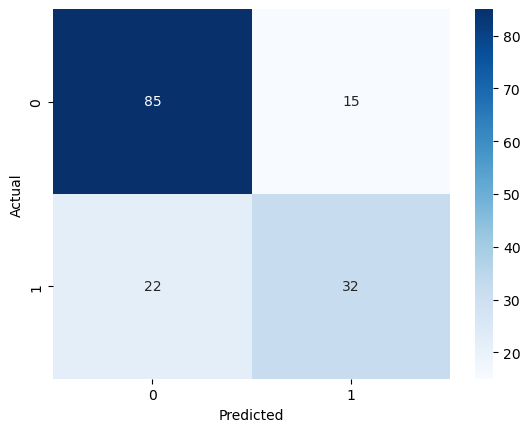

In [ ]:
# Print the confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_test_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Conclusion

In this analysis, we successfully developed and refined a machine learning model to predict the onset of diabetes based on diagnostic health measurements.

The process began with a **Logistic Regression** model. After identifying and correcting for overfitting, the regularized model established a stable and reliable baseline with a final test accuracy of **71.4%**.

To enhance predictive power, we then implemented a more complex **Random Forest Classifier**. This model achieved a superior test accuracy of **76.0%**, a significant improvement that showcases its ability to capture the complex, non-linear patterns within the data. This project demonstrates a complete machine learning workflow: from data cleaning and initial modeling to iterative evaluation and performance enhancement.